In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 
import yfinance as yf
#import nasdaqdatalink as nd


In [17]:
start = datetime.today() - timedelta(days=1365)
start = start.strftime('%Y-%m-%d')

end = datetime.today()
end = end.strftime("%Y-%m-%d")
df_tsla = yf.download('TSLA', start = start, end=end)
#df_tsla = nd.get("WIKI/TSLA", start_date='2022-10-01', end_date='2023-01-02')
#aapl = nasdaqdatalink.get("WIKI/AAPL", start_date='2006-10-01', end_date='2012-01-02')


[*********************100%***********************]  1 of 1 completed


In [18]:
df_tsla['MA20'] = df_tsla['Adj Close'].rolling(20).mean()
df_tsla['MA50'] = df_tsla['Adj Close'].rolling(50).mean()

In [19]:
df_tsla= df_tsla.dropna()

In [20]:
df_tsla = df_tsla[['Adj Close', 'MA20', 'MA50']]

<Axes: xlabel='Date'>

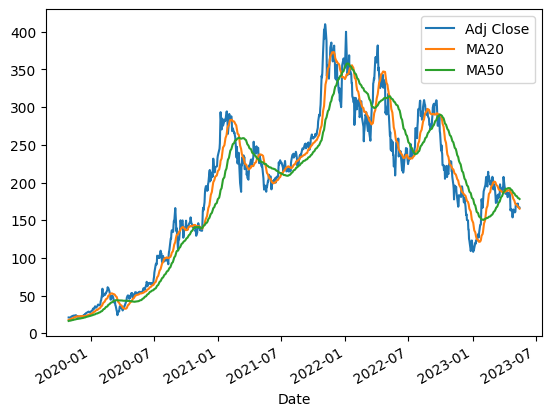

In [21]:
df_tsla.plot(fig=(12,6), legend=True) 

In [22]:
def MovingAverage(data, period):
    return pd.Series(data).rolling(period).mean()

In [23]:
df_tsla['SHORT_GR_LONG'] = np.where(df_tsla['MA20'] > df_tsla['MA50'], 1, 0)
df_tsla.tail(10)

,Adj Close,MA20,MA50,SHORT_GR_LONG
Date,,,,
2023-05-03,160.610001,172.877499,183.881400,0
2023-05-04,161.199997,171.661498,183.088200,0
2023-05-05,170.059998,170.911498,182.448000,0
2023-05-08,171.789993,170.275498,181.946200,0
2023-05-09,169.149994,169.393498,181.176599,0
2023-05-10,168.539993,168.793498,180.433199,0
2023-05-11,172.080002,168.102499,179.819399,0
2023-05-12,167.979996,167.251498,179.360999,0
2023-05-15,166.350006,166.216999,178.732199,0


In [24]:
df_tsla['Signal'] = df_tsla['SHORT_GR_LONG'].diff()
df_tsla.head(10)

,Adj Close,MA20,MA50,SHORT_GR_LONG,Signal
Date,,,,,
2019-10-30,21.000668,17.744733,16.403787,1,NaN
2019-10-31,20.994667,18.017700,16.529240,1,0.0
2019-11-01,20.887333,18.290633,16.650787,1,0.0
2019-11-04,21.164667,18.556467,16.792213,1,0.0
2019-11-05,21.148001,18.813700,16.928507,1,0.0
2019-11-06,21.771999,19.087200,17.078507,1,0.0
2019-11-07,22.369333,19.389867,17.238440,1,0.0
2019-11-08,22.476000,19.687367,17.392347,1,0.0
2019-11-11,23.006001,19.981133,17.551653,1,0.0


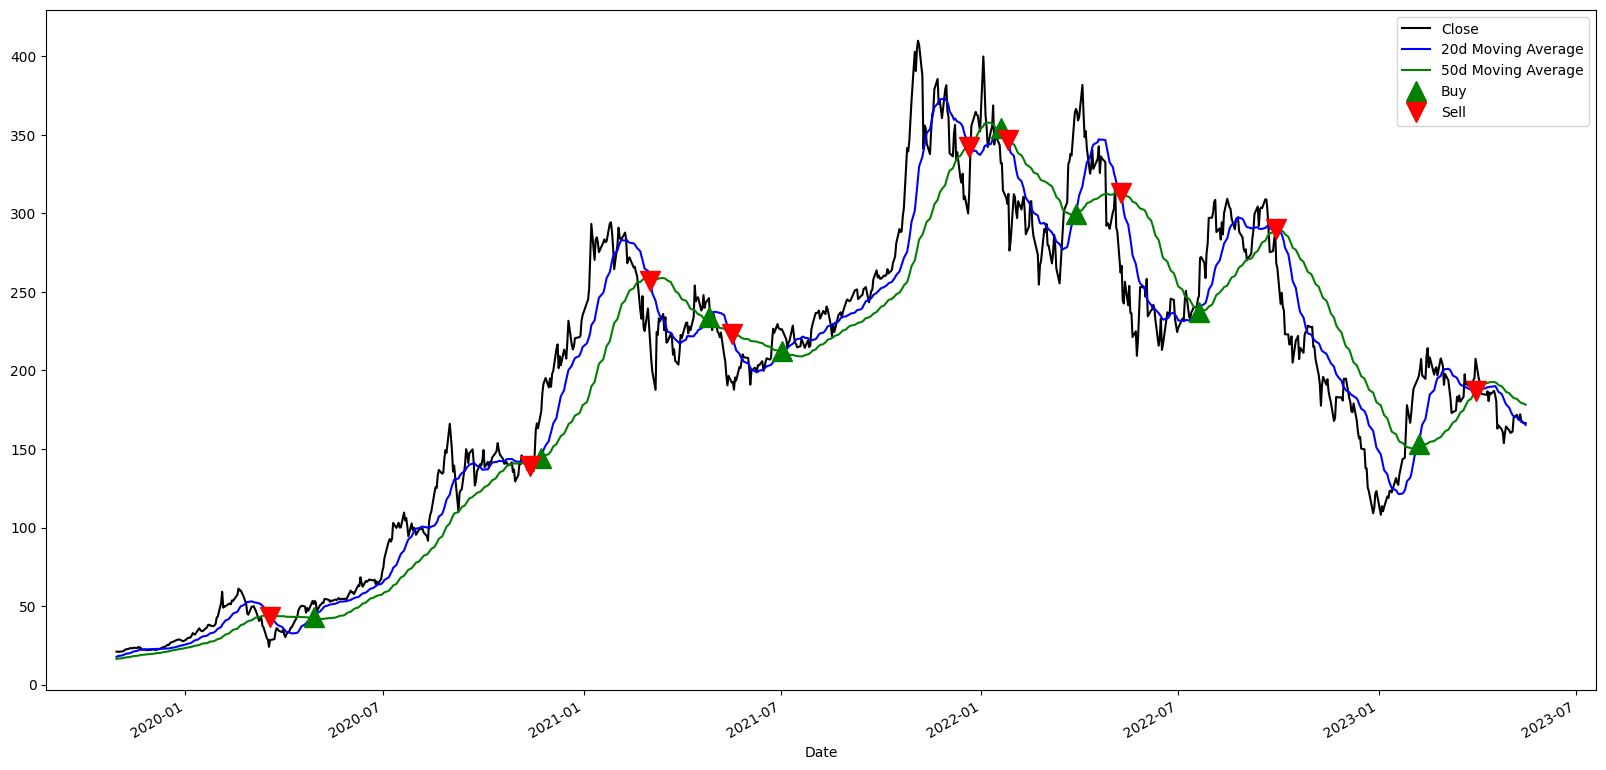

In [26]:
plt.figure(figsize=(20,10))
df_tsla['Adj Close'].plot(label='Close', color='k')
df_tsla['MA20'].plot(label='20d Moving Average', color='b')
df_tsla['MA50'].plot(label='50d Moving Average', color='g')

#add BUY signal to the plot
plt.plot(df_tsla[df_tsla['Signal'] == 1].index,
         df_tsla['MA20'][df_tsla['Signal'] == 1],
        '^', markersize = 15, color = 'g', label = 'Buy')

#add SELL signal to the plot
plt.plot(df_tsla[df_tsla['Signal'] == -1].index,
         df_tsla['MA20'][df_tsla['Signal'] == -1],
        'v', markersize = 15, color = 'r', label = 'Sell')


plt.legend()